### Introduction au jeu de données
- Lien : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


In [1]:
# import des différentes librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline


In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df = df.fillna(value= 'No Sleep Disorder')
df.columns = df.columns.str.title().str.replace(' ','_')

#### Etude primitive du jeu de données
- 13 colonnes et 374 lignes : un petit jeu de données
- 7 colonnes avec des valeurs de type entier, 5 de type de texte et 1 de type arrondi
- la colonne *"Blood Pressure"* pourrait être diviser en deux variables de type entier, une Systolic et une Diastolic
- à première vue, il n'y a pas de valeurs abberantes (describe)
- dans la colonne *'Sleep Disorder'*, des NaN ont été mis pour dire que le sujet n'a pas de trouble du sommeil, cela peut porter à confusion donc remplacer par 'No Sleep Disorder'
- des NaN que dans la colonne *'Sleep Disorder'* donc on va remplacer les valeurs manquantes avec la méthode fillna sur le dataset
- pas de doublons
- autant d'homme que de femme dans l'échantillon, des métiers assez premium (sauf vendeur) et plus de personnes sans troubles du sommeil(58%), avec de l'apnée (21%) et avec de l'insomnie (21%)

In [3]:
#séparer la colonne blood pressure en deux variables plus interprétable par la suite
df[['Systolic','Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)

#convertir les deux variables de type object en type numérique
df['Systolic'] = pd.to_numeric(df['Systolic'])
df['Diastolic'] = pd.to_numeric(df['Diastolic'])

#supprimer la colonne blood pressure qui n'a plus d'intérêt
df.drop(['Blood_Pressure','Person_Id','Occupation'], axis = 1, inplace= True)

In [4]:
# création de nouvelles variables 
# ratio_sleep_activity : Cela pourrait indiquer l'équilibre entre le repos et l'activité.
df['Ratio_Sleep_Activity'] = np.round(df['Sleep_Duration']/df['Physical_Activity_Level'],3)

#différence systolique - diastolique : indicateur de la pression pulsée
df['Diff_Systolic_Diastolic'] = df['Systolic'] - df['Diastolic']

#supprimer les variables systolic et diastolic
df = df.drop(['Systolic','Diastolic'], axis = 1)

#catégoriser l'âge
df['Cat_Age'] = pd.cut(df['Age'], bins = [0,18,30,50,65,100], labels = ['Enfant','Jeunes_adultes','Adultes_en_milieu_de_vie','Adultes_plus_âgés','Seniors'])

#mieux catégoriser la variable occupation
df['Occupation'] = df.Occupation.replace({'Software Engineer' : 'Ingénierie & Science',
                                          'Engineer' : 'Ingénierie & Science',
                                          'Scientist' : 'Ingénierie & Science',
                                          'Doctor' : 'Santé',
                                          'Nurse' : 'Santé',
                                          'Sales Representative' : 'Ventes & Commerce',
                                          'Salesperson' : 'Ventes & Commerce',
                                          'Teacher' : 'Enseignement',
                                          'Accountant' : 'Finance & Droit',
                                          'Lawyer' : 'Finance & Droit',
                                          'Manager' : 'Management'})

### DataVisualisation
##### Analyser la corrélation entre les variables numériques :
- *Sleep Duration* et *Quality of Sleep* sont fortement corrélés **(0.88)** donc peut être en sortir qu'un indice combiné des deux (somme des deux en ayant mis à la même échelle auparavant)
- La *quality of sleep* / *sleep* duration sont fortement corrélés négativement **(-0.81 et -0.9)** avec le Stress Level 
- *Daily steps* et *Physical Activity Level* sont fortement corrélés **(0.77)** donc peut être en sortir qu'un indice combiné des deux (somme des deux en ayant mis à la même échelle auparavant))
- *Systolic* et *Diastolic* sont fortement corrélés **(0.97)** donc garder que la différence semble être une bonne solution

for col in df.select_dtypes('object').columns:
    plt.figure()
    plt.pie(df[col].value_counts(), autopct= '%.f%%')
    plt.legend(df[col].value_counts().index,bbox_to_anchor=(1, 1))

for col in df.select_dtypes(['int','float']).columns:
    plt.figure()
    sns.boxplot(data = df, x = col)

plt.figure(figsize = (8,8))
sns.heatmap(df.select_dtypes(['int','float']).corr(), annot = True);

### Analyser les relations entre les variables du df et les variables liées au sommeil (Sleep Duration et Quality of Sleep)

- Il semblerait que plus tu es âgé, meilleure est la qualité de sommeil perçue (attention biais car les deux premiers critères 4 et 5 ont très peu d'échantillons) et plus le temps de sommeil est long (surtout pour les plus de 50 ans)
- Plus le niveau d'activité physique & le nombre de pas quotidien sont importants, meilleure est la qualité de sommeil et plus le sommeil est long. (attention dans l'interprétation des résultats, certaines valeurs ne sont pas représentatives car une seule personne représente une valeur donc une barre)
- Plus le niveau de stress est élevé, moins le sommeil est de bonne qualité et plus le sommeil est réduit.
- Plus la fréquence cardiaque est faible, meilleure est la qualité du sommeil et la durée est importante (relation avec le niveau d'activité physique et le stress)
- Pas d'observation pour la différence systolic-diastolic sur la qualité et la durée du sommeil
- Il ne semble pas y avoir de relation entre le genre et la qualité + durée du sommeil (bien que + de 95% des personnes de l'échantillon ayant une qualité de sommeil de 9 sur 10 sont des femmes)
- Pour le métier, on pourrait imagnier des différences mais pas de différences significatives visibles
- Il semblerait que plus la personne est en surpoids voire obésité et moins la qualité de sommeil est bonne et plus le sommeil est de courte durée.

- Attention : des valeurs de Ratio_Sleep_Activity nous montrent que ces personnes sont très similaires (même sexe, même métier, même niveau d'activité physique, même nombre de pas, même BMI category) peut être la même personne étudiée?

### Analyser les relations entre les variables du df et les troubles du sommeil

- Il semblerait que les femmes fassent plus d'apnée du sommeil que les hommes.
- Les personnes travaillant dans la santé semblent plus souffrir d'apnée du sommeil que le reste.
- Les personnes ayant un IMC normal ont un sommeil sans trouble la plupart et ceux qui souffrent de troubles (que ce soit apnée du sommeil ou bien d'insomnie) sont ceux en surpoids.
- La fréquence cardiaque ne semble pas avoir d'impact sur les troubles du sommeil ou non.
- Il semblerait que l'apnée du sommeil soit plus importante pour des personnes plus âgés (50 ans)
- Avoir un haut niveau d'activité physique & beaucoup de pas quotidien pourraient amener à de l'apnée du sommeil
- Il semblerait comme vu avant qu'un niveau de stress plus bas induit l'abscence de troubles du sommeil.
- La différence Systolic-Diastolic semble plus basse chez les personnes n'ayant pas de troubles du sommeil

for col in df.select_dtypes(['object']).columns.drop('Sleep Disorder'):
    plt.figure(figsize= (10,5))
    sns.histplot(data = df, hue = col, x = 'cat_age', palette= 'viridis', stat = 'percent', multiple= 'fill')

### D'autres analyses
- Il semblerait que selon le type de métier, la dépense énergétique n'est pas la même (santé et finance & droit +++), le niveau de stress est plus important dans le domaine du Commerce.
- Dans notre échantillon, les femmes semblent moins stresser que les hommes.
- Avec l'âge, le niveau de stress est plus faible mais moins de dépense énergétique et un IMC plus haut. Le stress semble donc être important car on a dit qu'avec l'âge le sommeil était de meilleur de qualité.
- Les obèses semblent avoir une différence systolic-diastolic plus importante que les autres.
- Plus de 50% des femmes de l'échantillon sont en surpoids, 70% des hommes ont un IMC normal et 85% des hommes sont obèses.
- Certaines professions ont un IMC normal (ingénierie & science, santé, finance & droit) et d'autres semblent plus facilement être en surpoids  (vente & commerce, enseignement et management)


for col in df.select_dtypes(['int','float']).columns.drop(['Quality of Sleep','Sleep Duration']):
    plt.figure(figsize= (10,5))
    sns.barplot(data = df, y = col, hue = 'BMI Category', palette= 'viridis')

### Etude statistique
#### Sleep Disorder
- Age : différence significative 
- Physical Activity Level : différence significative
- Stress Level : différence significative
- Heart rate : différence significative
- Daily Steps : différence significative
- Diff_Systolic_Diastolic : différence significative
- Gender : association significative
- Occupation: association significative
- BMI Category : association significative

#### Sleep Duration
- Age : différence significative 
- Physical Activity Level : différence significative
- Stress Level : différence significative
- Heart Rate : différence significative
- Daily Steps : pas de différence significative
- Diff_Systolic_Diastolic : différence significative
- Gender : différence significative
- Occupation: différence significative
- BMI Category : différence significative

#### Quality of Sleep
- Age : différence significative
- Physical Activity Level : différence significative
- Stress Level : différence significative
- Heart Rate : différence significative
- Daily Steps : pas de différence significative
- Diff_Systolic_Diastolic : différence significative
- Gender : association significative
- Occupation: association significative
- BMI Category : association significative


In [5]:
from scipy.stats import pearsonr

corr_pearson, p_value_pearson = pearsonr(df['Quality_Of_Sleep'], df['Age'])
print(f"Corrélation de Pearson entre variable_num1 et variable_num3:")
print(f"  Coefficient: {corr_pearson:.3f}")
print(f"  Valeur p: {p_value_pearson:.3f}")
if p_value_pearson < 0.05:
    print("  La corrélation est statistiquement significative.")
else:
    print("  La corrélation n'est pas statistiquement significative.")

Corrélation de Pearson entre variable_num1 et variable_num3:
  Coefficient: 0.474
  Valeur p: 0.000
  La corrélation est statistiquement significative.


In [6]:
from scipy.stats import ttest_ind, f_oneway

# Préparation des données pour l'ANOVA (pour 3 groupes ou plus)
groups = [df[df['Bmi_Category'] == cat]['Sleep_Duration'] for cat in df['Bmi_Category'].unique()]

# ANOVA (comparaison de plusieurs moyennes)
# H0: Les moyennes de tous les groupes sont égales.
# H1: Au moins une moyenne de groupe est différente des autres.
statistic_anova, p_value_anova = f_oneway(*groups)
print(f"ANOVA sur les catégories A, B et C:")
print(f"  Statistique F: {statistic_anova:.3f}")
print(f"  Valeur p: {p_value_anova:.3f}")
if p_value_anova < 0.05:
    print("  Il y a une différence significative entre les moyennes d'au moins deux groupes.")
else:
    print("  Il n'y a pas de différence significative entre les moyennes des groupes.")

ANOVA sur les catégories A, B et C:
  Statistique F: 20.662
  Valeur p: 0.000
  Il y a une différence significative entre les moyennes d'au moins deux groupes.


In [7]:
# Préparation des données pour le test t (pour deux groupes)
group_A = df[df['Gender'] == 'Male']['Sleep_Duration']
group_B = df[df['Gender'] == 'Female']['Sleep_Duration']

# Test t de Student (comparaison de deux moyennes)
# H0: Les moyennes des deux groupes sont égales.
# H1: Les moyennes des deux groupes sont différentes.
statistic_ttest, p_value_ttest = ttest_ind(group_A, group_B)
print(f"\nTest t de Student entre Catégorie A et B:")
print(f"  Statistique t: {statistic_ttest:.3f}")
print(f"  Valeur p: {p_value_ttest:.3f}")
if p_value_ttest < 0.05:
    print("  Il y a une différence significative entre les moyennes des groupes A et B.")
else:
    print("  Il n'y a pas de différence significative entre les moyennes des groupes A et B.")



Test t de Student entre Catégorie A et B:
  Statistique t: -2.362
  Valeur p: 0.019
  Il y a une différence significative entre les moyennes des groupes A et B.


In [8]:
from scipy.stats import chi2_contingency

# Créer un tableau de contingence
# C'est un tableau qui montre la fréquence conjointe des catégories
contingency_table = pd.crosstab(df['Sleep_Disorder'], df['Gender'])
print("Tableau de contingence:\n", contingency_table)

# Test du Chi-2 d'indépendance
# H0: Les deux variables catégorielles sont indépendantes.
# H1: Les deux variables catégorielles sont associées.
chi2, p_value_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"\nTest du Chi-2 d'indépendance:")
print(f"  Statistique Chi-2: {chi2:.3f}")
print(f"  Valeur p: {p_value_chi2:.3f}")
print(f"  Degrés de liberté: {dof}")
if p_value_chi2 < 0.05:
    print("  Il y a une association statistiquement significative entre la couleur et la taille.")
else:
    print("  Il n'y a pas d'association statistiquement significative entre la couleur et la taille.")

Tableau de contingence:
 Gender             Female  Male
Sleep_Disorder                 
Insomnia               36    41
No Sleep Disorder      82   137
Sleep Apnea            67    11

Test du Chi-2 d'indépendance:
  Statistique Chi-2: 54.306
  Valeur p: 0.000
  Degrés de liberté: 2
  Il y a une association statistiquement significative entre la couleur et la taille.


In [9]:
# modification de la variable Gender binaire de type texte en 0 et 1 (entier)
df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female' : 1})

# on sépare les variables d'intérêts (Qualité du sommeil, durée et troubles du sommeil) des variables (features) du dataframe
Quality_Of_Sleep = df['Quality_Of_Sleep']
Sleep_Duration = df['Sleep_Duration']
Sleep_Disorder = df['Sleep_Disorder']
features = pd.get_dummies(df.drop(['Quality_Of_Sleep','Sleep_Duration','Sleep_Disorder'], axis = 1))



C:\Users\antho\AppData\Local\Temp\ipykernel_12804\3708203568.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female' : 1})


In [18]:
# import des différentes variables
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import shap

In [11]:
# supprimer les variables constantes
features = features.drop(features.columns[features.nunique() == 1], axis = 1)

In [12]:
features_copy = features.copy()
features_copy['Physical_Activity_Global'] = StandardScaler().fit_transform(features[['Physical_Activity_Level','Daily_Steps']]).mean(axis = 1)

In [13]:
features_copy = features_copy.drop(['Age','Ratio_Sleep_Activity','Physical_Activity_Level','Daily_Steps'], axis = 1)

In [14]:
def model_ml(features,target, model, param_grid, test_size = 0.25, random_state = 66, n_iter = 10, cv = 5,
             scaler = StandardScaler(), selector = SelectKBest()):
    """
    Entraîne et évalue un pipeline d'apprentissage automatique selon un modèle

    Args:
    features : variables d'intérêt du df
    target : variable cible
    model : modèle de ML/DL utilisé
    param_grid : hyperparamètres à utiliser lors de la Pipeline
    test_size : taille de l'échantillon de test
    random_state :
    n_iter : nombre d'itération du RandomizedSearchCV testé
    cv : nombre d'échantillons créés pour la validation croisée
    scaler : étape de normalisation
    selector : sélectionner les variables d'intérêts pour l'entraînement du modèle

    Returns:
    grid : modèle entraîné retourné
    y_pred : valeurs prédites par le modèle
    confusion_matrix : matrice de confusion créée    
    """
    x_train, x_test, y_train, y_test = train_test_split(features, Sleep_Disorder, test_size = test_size, random_state = random_state)

    model_pipeline = Pipeline(steps= [('normalisation', scaler),
                                      ('kbest', selector),
                                      ('model', model)])

    

    grid = RandomizedSearchCV(model_pipeline,param_distributions = param_grid, n_iter = n_iter , cv = cv,
                              scoring = 'accuracy', n_jobs = -1, random_state = random_state)
    grid.fit(x_train,y_train)
    y_pred = grid.predict(x_test)
    print(f"{model.__class__.__name__}\n")
    print("Meilleur_score :", grid.best_score_)
    print("Meilleurs paramètres :", grid.best_params_)

    confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['valeurs réelles'], colnames= ['valeurs prédites'])
    print("Matrice de confusion :\n", confusion_matrix)

    # Après avoir entraîné votre pipeline 'grid.best_estimator_'
    result = permutation_importance(grid.best_estimator_, x_test, y_test,
                                    n_repeats=10, random_state=random_state, n_jobs=-1)

    sorted_idx = result.importances_mean.argsort()
    feature_names = features.columns[sorted_idx] # Assurez-vous d'avoir les noms de vos colonnes

    print("\nImportance des caractéristiques par permutation :")


    # Vous pouvez aussi visualiser
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, result.importances_mean[sorted_idx])
    plt.xlabel("Importance de la permutation")
    plt.ylabel("Caractéristique")
    plt.title("Importance des caractéristiques (Permutation Importance)")
    plt.tight_layout()
    plt.show()

    print(grid.best_estimator_.predict_proba)

    return grid, y_pred, confusion_matrix


### Prédiction des modèles
##### Avec toutes les variables de base
- Logistic Regression : meilleur score 0.9
- SVC : meilleur score 0.925
- KNeighborsClassifier : meilleur score 0.9

##### En enlevant l'âge
- Logistic Regression : meilleur score 0.907
- SVC : meilleur score 0.914
- KNeighborsClassifier : meilleur score 0.903

##### En combinant deux variables Physical_Activity_Level & Daily_Steps en une seule
- Logistic Regression : meilleur score 0.904
- SVC : meilleur score 0.918
- KNeighborsClassifier : meilleur score 0.907

##### En retirant les catégories d'emploi
- Logistic Regression : meilleur score 0.911
- SVC : meilleur score 0.918
- KNeighborsClassifier : meilleur score 0.907

##### En transformant Normal-Weight par Normal
- Logistic Regression : meilleur score 0.907
- SVC : meilleur score 0.918
- KNeighborsClassifier : meilleur score 0.896

##### En partant du principe que le métier et le niveau de stress sont reliés par rapport à leur impact sur le sommeil donc supprimer l'occupation
- Logistic Regression : meilleur score 0.893
- SVC : meilleur score 0.914
- KNeighborsClassifier : meilleur score 0.929

LogisticRegression

Meilleur_score : 0.8928571428571429
Meilleurs paramètres : {'model__C': 1, 'kbest__k': 10}
Matrice de confusion :
 valeurs prédites   Insomnia  No Sleep Disorder  Sleep Apnea
valeurs réelles                                            
Insomnia                 15                  4            4
No Sleep Disorder         0                 45            5
Sleep Apnea               0                  2           19

Importance des caractéristiques par permutation :


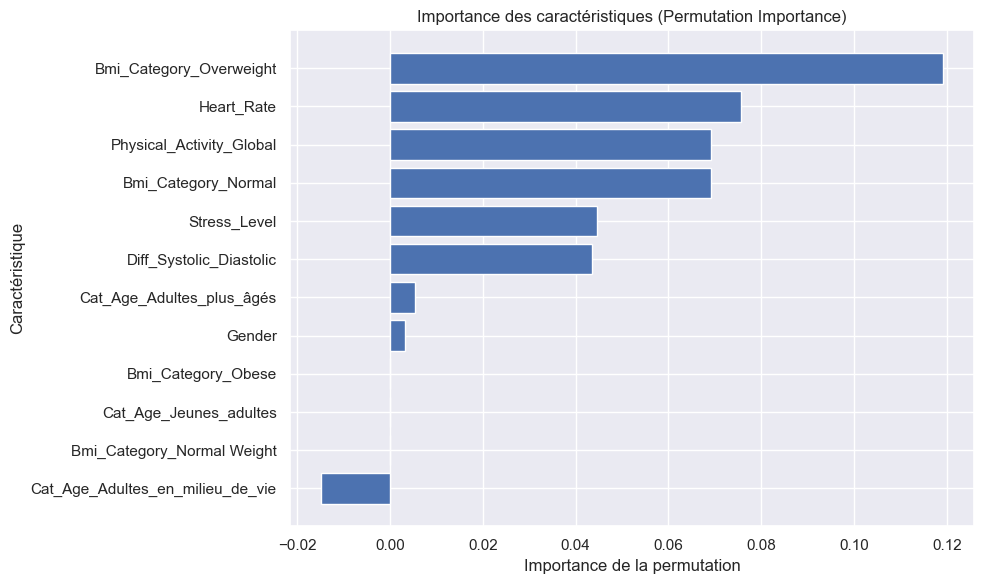

<bound method Pipeline.predict_proba of Pipeline(steps=[('normalisation', StandardScaler()), ('kbest', SelectKBest()),
                ('model',
                 LogisticRegression(C=1, random_state=66, solver='liblinear'))])>


In [15]:
log_reg_model = LogisticRegression(solver= 'liblinear', random_state = 66)
log_reg_params = {'kbest__k' : [10,12,15,18,'all'],
                  'model__C' : [0.0001,0.001,0.01,0.1,1]}

grid_lr, y_pred_lr, cm_lr = model_ml(features = features_copy, target = Sleep_Disorder, model = log_reg_model, param_grid = log_reg_params, n_iter = 25)

- BMI_Category_Overweight / BMI_Category_Normal / Stress_Level / Diff_Systolic_Diastolic / Physical_Activity_Level semblent être les variables les plus pertinentes pour l'algorithme

c:\Users\antho\data\sleep-health-and-lifestyle\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=12. All the features will be returned.
  warnings.warn(


SVC

Meilleur_score : 0.9142857142857144
Meilleurs paramètres : {'model__kernel': 'rbf', 'model__gamma': 'auto', 'model__C': 1, 'kbest__k': 15}
Matrice de confusion :
 valeurs prédites   Insomnia  No Sleep Disorder  Sleep Apnea
valeurs réelles                                            
Insomnia                 15                  4            4
No Sleep Disorder         0                 47            3
Sleep Apnea               0                  2           19

Importance des caractéristiques par permutation :


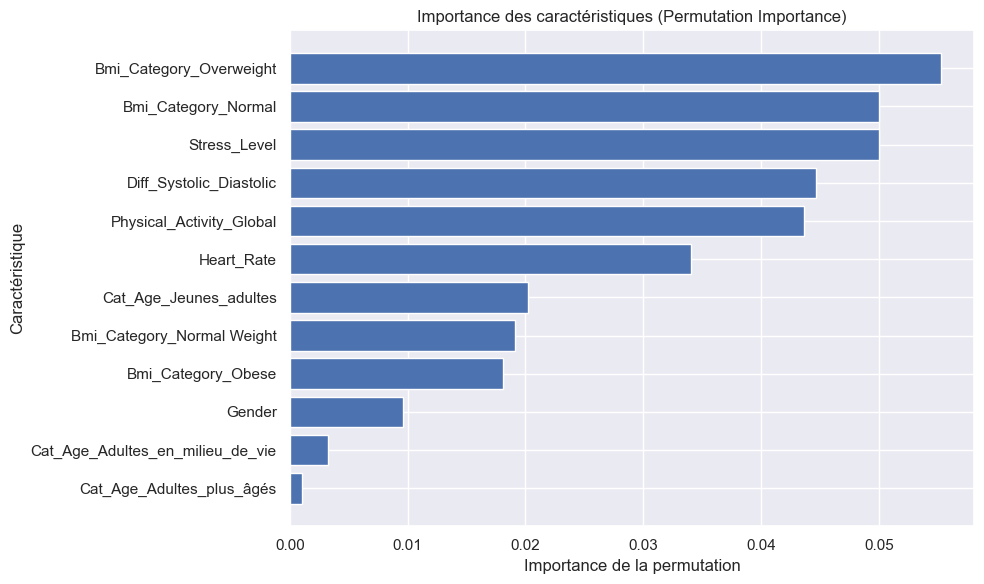

<bound method Pipeline.predict_proba of Pipeline(steps=[('normalisation', StandardScaler()),
                ('kbest', SelectKBest(k=15)),
                ('model',
                 SVC(C=1, gamma='auto', probability=True, random_state=66))])>


In [16]:
svc_model = SVC(random_state=66, probability= True)
svc_params = {'kbest__k' : [10,12,15,18,'all'],
              'model__C' : [0.0001,0.001,0.01,0.1,1],
              'model__kernel' : ['linear','poly','rbf','sigmoid'],
              'model__gamma' : ['scale','auto']}
grid_svc,y_pred_svc,cm_svc = model_ml(features_copy, Sleep_Disorder, model = svc_model, param_grid= svc_params, n_iter= 100)

KNeighborsClassifier

Meilleur_score : 0.9285714285714286
Meilleurs paramètres : {'model__n_neighbors': 3, 'kbest__k': 12}
Matrice de confusion :
 valeurs prédites   Insomnia  No Sleep Disorder  Sleep Apnea
valeurs réelles                                            
Insomnia                 15                  4            4
No Sleep Disorder         0                 47            3
Sleep Apnea               0                  2           19

Importance des caractéristiques par permutation :


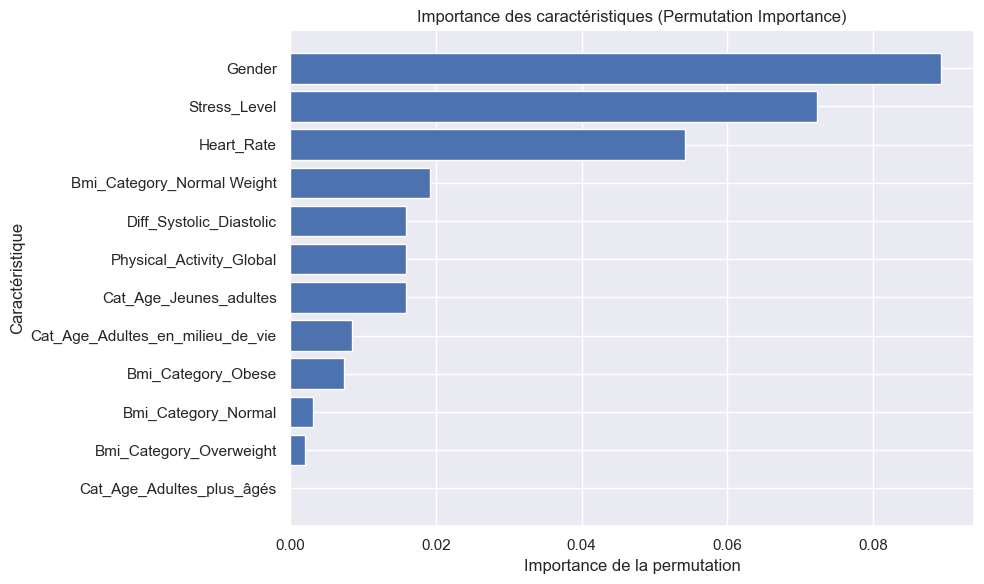

<bound method Pipeline.predict_proba of Pipeline(steps=[('normalisation', StandardScaler()),
                ('kbest', SelectKBest(k=12)),
                ('model', KNeighborsClassifier(n_neighbors=3))])>


In [17]:
knc_model = KNeighborsClassifier()
knc_params = {'kbest__k' : [10,12,15,18,'all'],
              'model__n_neighbors' : [2,3,4,5,10,20]}
grid_knc, y_pred_knc, cm_knc = model_ml(features_copy, target = Sleep_Disorder, model = knc_model, param_grid = knc_params, n_iter = 25)

c:\Users\antho\data\sleep-health-and-lifestyle\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=18 is greater than n_features=12. All the features will be returned.
  warnings.warn(


DecisionTreeClassifier

Meilleur_score : 0.9142857142857143
Meilleurs paramètres : {'model__min_samples_leaf': 1, 'model__max_depth': 9, 'model__criterion': 'entropy', 'kbest__k': 18}
Matrice de confusion :
 valeurs prédites   Insomnia  No Sleep Disorder  Sleep Apnea
valeurs réelles                                            
Insomnia                 17                  4            2
No Sleep Disorder         0                 47            3
Sleep Apnea               0                  2           19

Importance des caractéristiques par permutation :


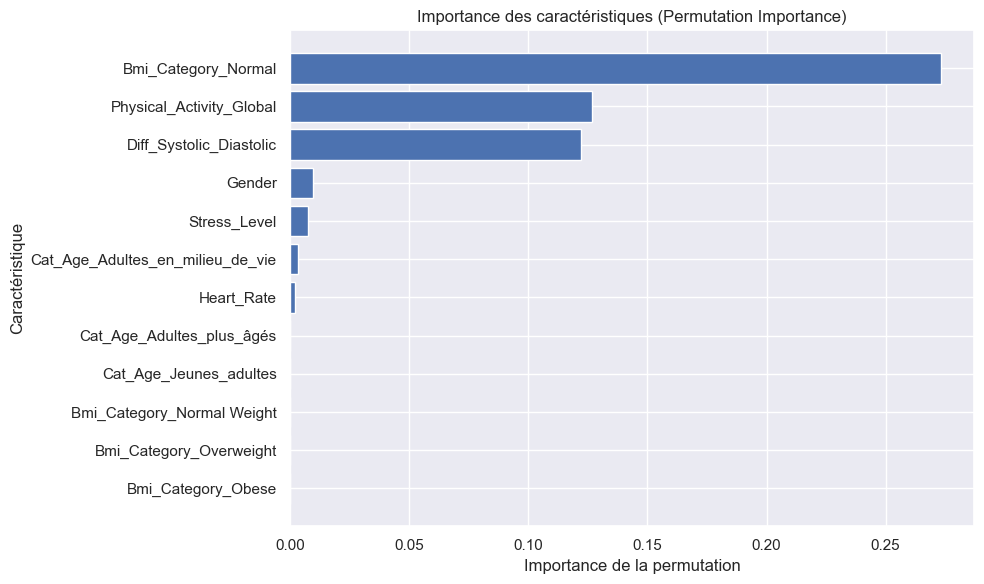

<bound method Pipeline.predict_proba of Pipeline(steps=[('normalisation', StandardScaler()),
                ('kbest', SelectKBest(k=18)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=9,
                                        random_state=66))])>


In [19]:
dt_model = DecisionTreeClassifier(random_state= 66)
dt_params = {'kbest__k' : [10,12,15,18,'all'],
             'model__max_depth' : [3,5,7,9],
             'model__min_samples_leaf' : [1,5,10,15],
             'model__criterion' : ['gini','entropy','log_loss']}
grid_dt, y_pred_dt, cm_dt = model_ml(features_copy, Sleep_Disorder, dt_model, dt_params, n_iter = 30)

### Interprétabilité